<a href="https://colab.research.google.com/github/tomasz-te/EDA-DPL-Stock-Analysis/blob/main/EDA_DPL_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install yfinance
#!pip install pandas_ta

import yfinance as yf
import pandas as pd
import random
import matplotlib.pyplot as plt
import pandas_ta as ta


In [2]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
list_of_stocks = dfs[0].Symbol
list_of_stocks.head()

0     MMM
1     AOS
2     ABT
3    ABBV
4    ABMD
Name: Symbol, dtype: object

In [3]:
len(list_of_stocks)

504

In [4]:
ticker = random.choice(list_of_stocks)
ticker

'CRM'

In [5]:
stock = yf.Ticker(ticker)
stock.history().head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-14,198.240005,200.160004,191.820007,193.119995,5665500,0,0
2022-03-15,198.529999,199.960007,192.740005,196.139999,5276300,0,0
2022-03-16,198.660004,205.899994,197.330002,205.570007,6043400,0,0


In [6]:
stock.history().isna().sum().sum()

0

In [7]:
stock.earnings

,Revenue,Earnings
Year,,
2019,13282000000,1110000000
2020,17098000000,126000000
2021,21252000000,4072000000
2022,26492000000,1444000000


In [8]:
stock_name = stock.info['longName']

In [9]:
period = "1y"
interval = "1d"
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# Exceptions!!!!!!!!
stock_price = stock.history(period=period,interval=interval).drop(['Stock Splits', 'Dividends'], axis=1)

#stock_price = stock.history().Close
#stock_volume = stock.history(period=period,interval=interval).Volume


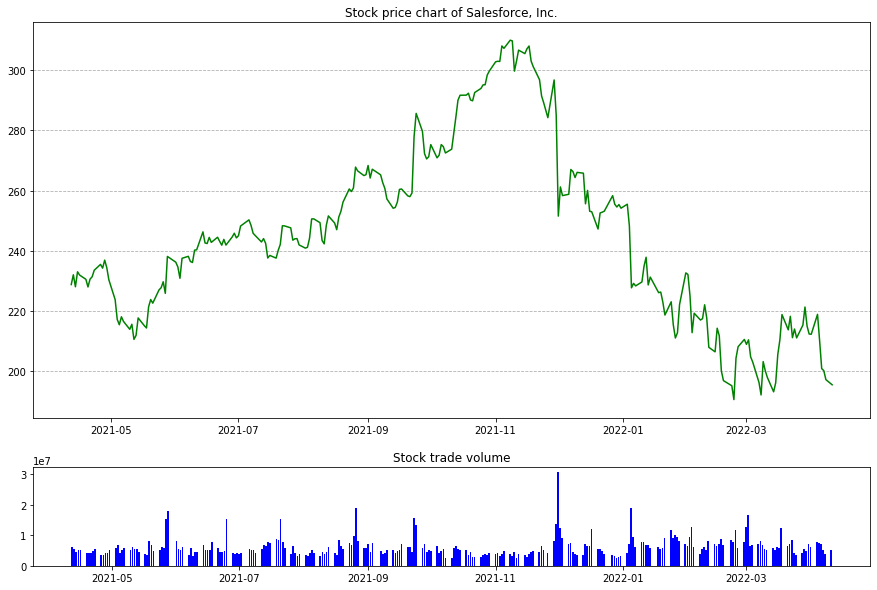

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10), gridspec_kw={'height_ratios': [4, 1]})
ax1.set(title="Stock price chart of "+stock_name)
ax1.plot(stock_price.index, stock_price.Close, color="g")
ax1.grid(axis='y', ls='--')
ax2.set(title="Stock trade volume")
ax2.bar(stock_price.index, stock_price.Volume, color="blue")
plt.show()

In [11]:
sma_range = [10,30,100]
for sma in sma_range:
  stock_price[f'SMA_{sma}'] = stock_price['Close'].rolling(sma).mean()

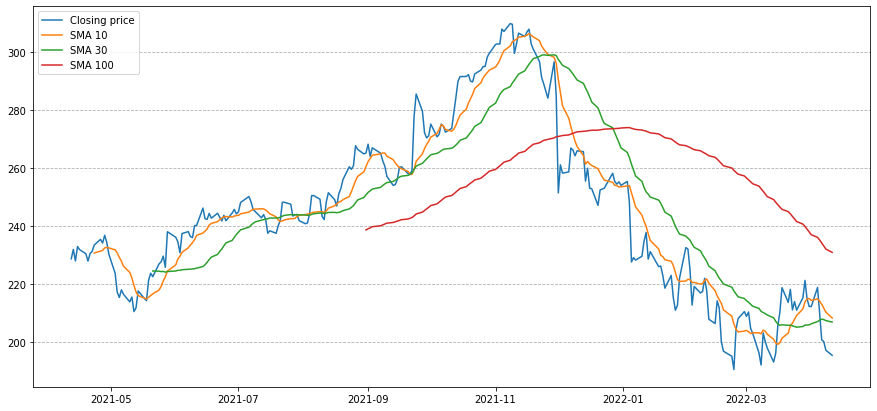

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(stock_price.index, stock_price.Close, label="Closing price")
for sma in sma_range:
  ax.plot(stock_price.index, stock_price[f'SMA_{sma}'], label=f"SMA {sma}")
ax.grid(axis='y', ls='--')
plt.legend(loc="upper left")
plt.show()

In [13]:
ewma_range = [10,30,100]
for ewma in ewma_range:
  stock_price[f'EWMA_{ewma}'] = stock_price['Close'].ewm(span=ewma, adjust=False).mean()

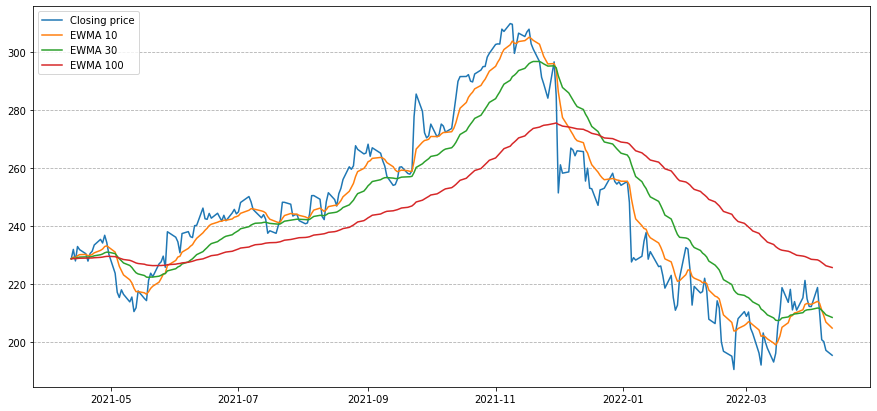

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(stock_price.index, stock_price.Close, label="Closing price")

for ewma in ewma_range:
  ax.plot(stock_price.index, stock_price[f'EWMA_{ewma}'], label=f"EWMA {ewma}")

ax.grid(axis='y', ls='--')
plt.legend(loc="upper left")
plt.show()

In [15]:
stock_price.head()

,Open,High,Low,Close,Volume,SMA_10,SMA_30,SMA_100,EWMA_10,EWMA_30,EWMA_100
Date,,,,,,,,,,,
2021-04-12,229.520004,229.850006,227.149994,228.759995,6205700,NaN,NaN,NaN,228.759995,228.759995,228.759995
2021-04-13,229.000000,233.490005,228.500000,232.000000,5397100,NaN,NaN,NaN,229.349086,228.969027,228.824153
2021-04-14,232.850006,233.139999,227.660004,228.020004,4617600,NaN,NaN,NaN,229.107435,228.907800,228.808229
2021-04-15,229.869995,233.080002,229.500000,233.000000,5073900,NaN,NaN,NaN,229.815174,229.171813,228.891235
2021-04-16,234.000000,234.000000,229.889999,231.910004,5088700,NaN,NaN,NaN,230.196052,229.348470,228.951012


In [16]:
stock_price['RSI_14']=ta.rsi(stock_price['Close'],lenght=14)

In [17]:
hor70=[70 for price in stock_price['RSI_14']]
hor30=[30 for price in stock_price['RSI_14']]

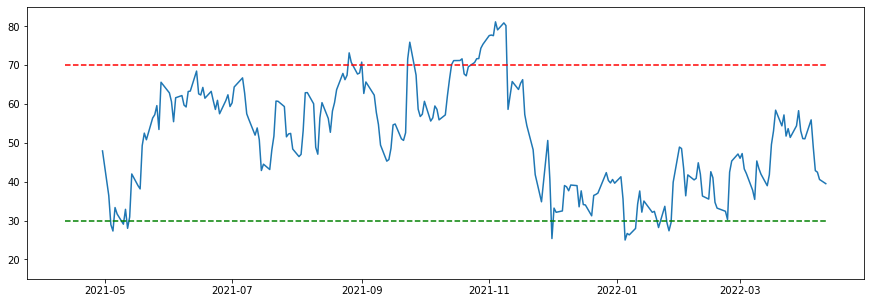

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(stock_price.index, stock_price['RSI_14'])
ax.plot(stock_price.index, hor70, ls='--',c='r')
ax.plot(stock_price.index, hor30, ls='--',c='g')
plt.ylim(15,85)

plt.show()

In [19]:
stock_price.ta.indicators()


Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [20]:
MACD = ta.macd(stock_price['Close'],fast=12, slow=26, signal=9)
stock_price = pd.concat([stock_price,MACD],axis=1)

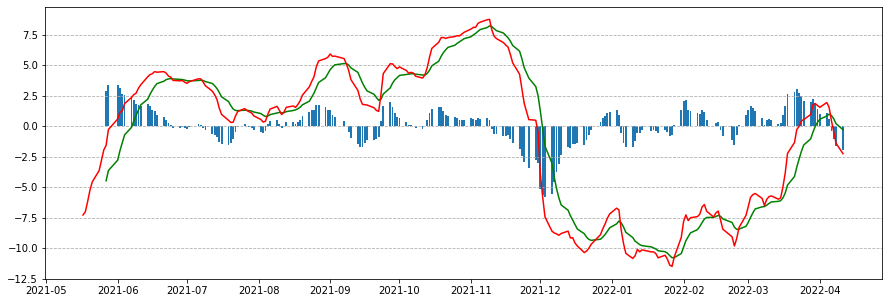

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(stock_price.index, stock_price['MACDh_12_26_9'])
ax.plot(stock_price.index, stock_price['MACDs_12_26_9'],c='g')
ax.plot(stock_price.index, stock_price['MACD_12_26_9'],c='r')
ax.grid(axis='y', ls='--')

plt.show()

In [22]:
STOCH = ta.stoch(high=stock_price.High,low=stock_price.Low,close=stock_price.Close)
stock_price = pd.concat([stock_price, STOCH], axis=1)

In [23]:
hor80=[80 for price in stock_price['STOCHd_14_3_3']]
hor20=[20 for price in stock_price['STOCHd_14_3_3']]

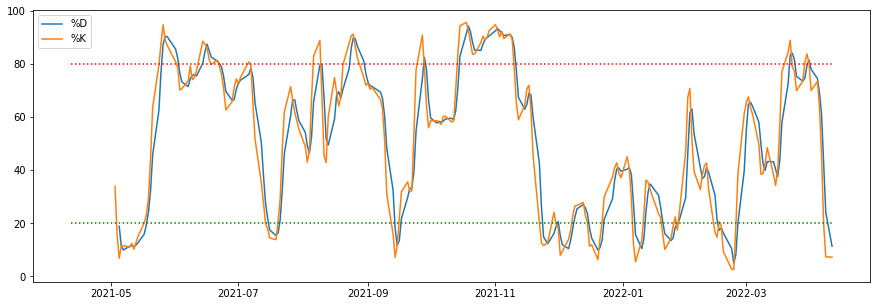

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(stock_price.index, stock_price['STOCHd_14_3_3'], label='%D')
ax.plot(stock_price.index, stock_price['STOCHk_14_3_3'], label='%K')
ax.plot(stock_price.index, hor20, ls=':',c='g')
ax.plot(stock_price.index, hor80, ls=':',c='r')

plt.legend(loc='upper left')
plt.show()

In [25]:
bbands = ta.bbands(stock_price.Close, length=20, std=2)
bbands.tail(2)

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
Date,,,,,
2022-04-08,193.723162,209.765501,225.807840,15.295498,0.107429
2022-04-11,194.297570,209.882001,225.466433,14.850660,0.036974


In [26]:
stock_price = pd.concat([stock_price,bbands], axis=1)

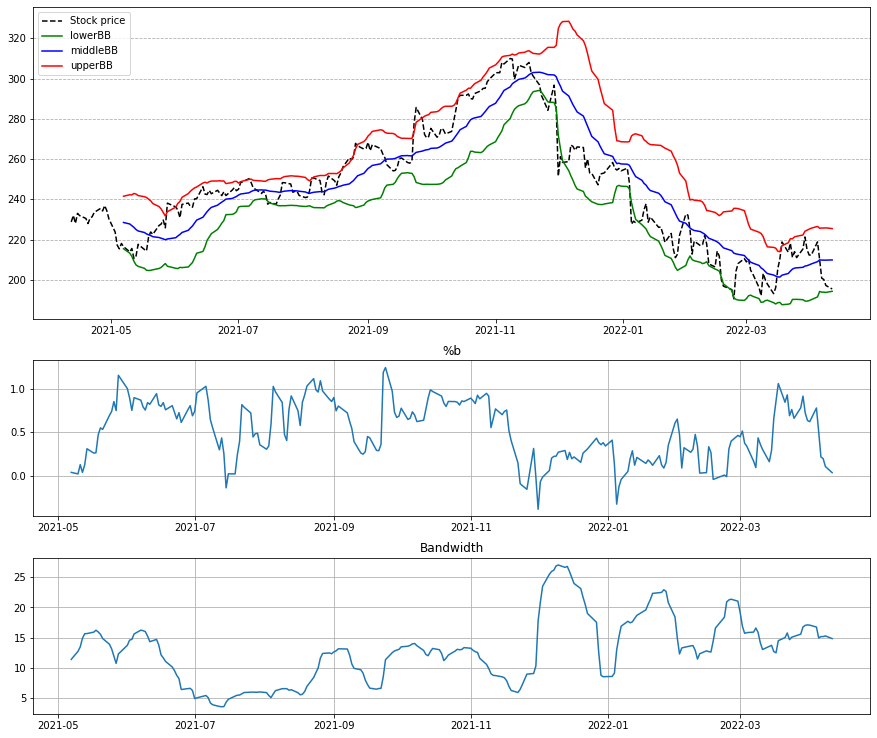

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,13), gridspec_kw={'height_ratios': [2, 1, 1]})
ax1.plot(stock_price.Close, ls='--', c='k', label='Stock price')
ax1.plot(stock_price['BBL_20_2.0'], c='g', label = 'lowerBB')
ax1.plot(stock_price['BBM_20_2.0'], c='b', label = 'middleBB')
ax1.plot(stock_price['BBU_20_2.0'], c='r', label = 'upperBB')
ax1.legend(loc='upper left')
ax2.plot(stock_price['BBP_20_2.0'])
ax3.plot(stock_price['BBB_20_2.0'])
ax1.grid(axis='y', ls='--')
ax2.grid()
ax2.set_title('%b')
ax3.grid()
ax3.set_title('Bandwidth')
plt.show()

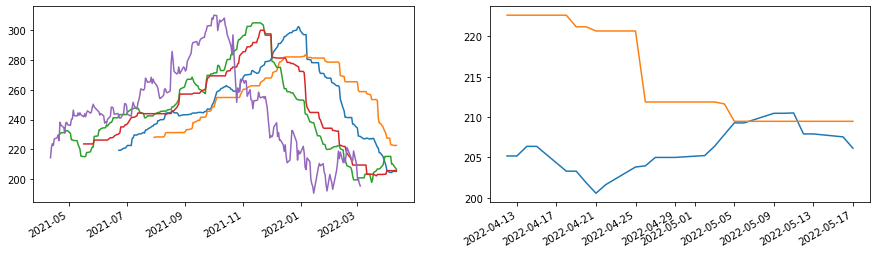

In [41]:
# help(ta.ichimoku)
# ichi_now, ichi_fut = ta.ichimoku(high=stock_price.High,low=stock_price.Low,close=stock_price.Close)
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
# fig.autofmt_xdate()
# ax1.plot(ichi_now)
# ax2.plot(ichi_fut)
# plt.show()